In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:

encoder = ce.BinaryEncoder(cols=['Sex', 'Embarked'])
encoded = encoder.fit_transform(df)

In [3]:
features = ['Pclass', 'Sex_0', 'Sex_1', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_0', 'Embarked_1', 'Embarked_2']
X = encoded[features]
y = df['Survived']
X = X.fillna(X.mean())

In [4]:
random_states = [1, 10,42]
accuracies = []

In [5]:
for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
   
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Accuracy for random state {state}: {accuracy}")

Accuracy for random state 1: 0.7318435754189944
Accuracy for random state 10: 0.7206703910614525
Accuracy for random state 42: 0.7150837988826816


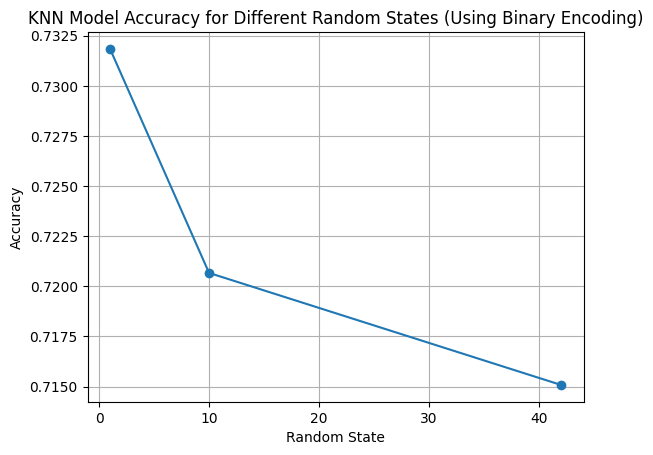

In [6]:
import matplotlib.pyplot as plt

plt.plot(random_states, accuracies, marker='o')
plt.title('KNN Model Accuracy for Different Random States')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()